In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [274]:
df = pd.read_csv('titanic_dataset.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    object 
 2   Name                     887 non-null    object 
 3   Sex                      874 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [275]:
df.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3 pclass,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1-pclas,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3-pclass,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3-pclass,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2-pclass,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [11]:
# cleaning data: how many NaN values for each column (variable)
no_NaN = df.isna().sum()
no_NaN

Survived                    0
Pclass                      0
Name                        0
Sex                        13
Age                         0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        0
dtype: int64

In [14]:
# check for unique values for each column
df.nunique(axis='index',dropna='false')

Survived                     2
Pclass                      23
Name                       887
Sex                          2
Age                        109
Siblings/Spouses Aboard     11
Parents/Children Aboard     10
Fare                       261
dtype: int64

In [15]:
df['Sex'].unique()
# no typos in this variable

array(['male', 'female', nan], dtype=object)

In [16]:
df['Pclass'].unique()

array(['3 pclass', '1 pclass', '1 pcl', '1-pclas', '3-pclass', '2-pclass',
       '1-pclass', '2 pcl', '3 pcla', '1 pcla', '2 pclas', '1-pcl',
       '2 pclass', '3-pclas', '1-pcla', '3 pclas', '1 pclas', '2 pcla',
       '2-pclas', '3-pcla', '2-pcla', '3-pcl', '3 pcl'], dtype=object)

In [260]:
# convert all pclasses to their respective numbers
# this is object not string, this is what to do if it was string: class_df = pd.to_numeric(df['Pclass'])
# check if p1 in i (loop through column)
p1 = '1'
p2 = '2'
p3 = '3'
df.loc[df['Pclass'].str.contains(p1), 'Pclass'] = '1'
df.loc[df['Pclass'].str.contains(p2), 'Pclass'] = '2'
df.loc[df['Pclass'].str.contains(p3), 'Pclass'] = '3'
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [6]:
for x in df.index:
    if df.loc[x, 'Age'] <1:
        df.drop(x, inplace = True)
#cleaning data, ages less than 1

In [7]:
for x in df.index:
    if df.loc[x, 'Age'] >90:
        df.drop(x, inplace = True)
#cleaning data, ages greater than 90 

In [8]:
df2 = df.drop(labels=[56,110,115,121,122,147,151,152,202,226,294,329,522,673,731,810,839], axis=0)
#cleaning data, removing rows with decimals as ages

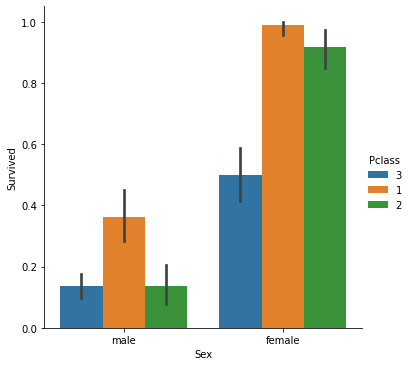

In [52]:
sns.catplot(x='Sex',y='Survived', hue = 'Pclass', kind = 'bar', data=df2)
#this chart agrees with the theory that women and children were let off first on the titanic, 
#also higher classes had better survival rate, inferring from the data

In [295]:
# clean up age data
df['Age'].astype(int).abs()

0      22
1      38
2      26
3      35
4      35
       ..
882    27
883    19
884     7
885    26
886    32
Name: Age, Length: 887, dtype: int32

In [287]:
age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100])

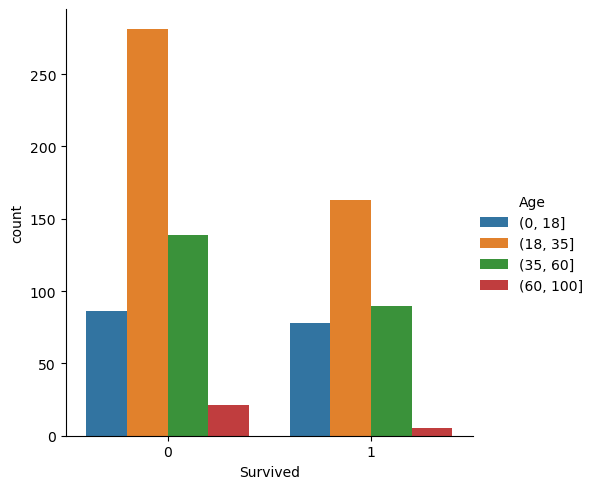

In [296]:
sns.catplot(df, hue=age_groups, x='Survived', kind='count')